<a href="https://colab.research.google.com/github/dwiputri-git/employee-promotion-ml-project/blob/main/Employee_Career_Advancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset**

Employee Career Advancement Prediction Data

**Summary**

The company faces challenges in determining which employees are eligible for promotion. Traditionally, promotion decisions have often been subjective, relying heavily on manual evaluations by managers. This approach can lead to bias, lack of transparency, and the potential loss of high-performing employees. By leveraging historical employee data, the company can build a classification model to predict promotion eligibility based on factors such as performance, experience, leadership, and participation in training or projects.

**Goal**

Identifying the most influential factors in promotion decisions and building a classification prediction model using supervised learning to predict which employees are eligible for promotion.

Dataset ini berisi fitur-fitur sebagai berikut:
1. Employee_ID : ID unik untuk tiap karyawan
2. Age : Usia karyawan (terdapat missing & anomali)
3. Years_at_Company : Lama bekerja di perusahaan (tahun)
4. Performance_Score : Skor performa tahunan (1-5)
5. Leadership_Score : Skor kepemimpinan (0-100)
6. Training_Hours : Jumlah jam pelatihan yang diikuti karyawan
7. Projects_Handled : Jumlah proyek yang pernah ditangani
8. Peer_Review_Score : Skor penilaian rekan kerja (0-100)
9. Current_Position_Level : Level jabatan saat ini (Junior, Mid, Senior, Lead)
10. Promotion_Eligible : Label target: 1 = eligible dipromosikan, 0 = tidak eligible




# Stage 0

### Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rakamin Bootcamp - Dataset - Promotion Dataset.csv to Rakamin Bootcamp - Dataset - Promotion Dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Rakamin Bootcamp - Dataset - Promotion Dataset.csv", sep=';')
df.sample()

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
631,EMP0632,33.0,20.0,4.0,18.0,177.0,17.0,32.0,Lead,0.0


In [ ]:
# Filter Promotion_Eligible = 1.0, lalu ambil sampel random 5 baris
df[df['Promotion_Eligible'] == 1.0].sample(n=5, random_state=42)

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
135,EMP0136,59.0,NaN,4.0,81.0,131.0,18.0,23.0,Mid,1.0
419,EMP0420,48.0,25.0,1.0,40.0,194.0,6.0,71.0,Mid,1.0
870,EMP0871,55.0,7.0,4.0,54.0,NaN,14.0,10.0,Mid,1.0
930,EMP0931,NaN,21.0,2.0,92.0,80.0,14.0,96.0,Senior,1.0
560,EMP0561,46.0,0.0,3.0,29.0,197.0,11.0,44.0,Junior,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_ID             1000 non-null   object 
 1   Age                     950 non-null    float64
 2   Years_at_Company        951 non-null    float64
 3   Performance_Score       950 non-null    float64
 4   Leadership_Score        950 non-null    float64
 5   Training_Hours          950 non-null    float64
 6   Projects_Handled        950 non-null    float64
 7   Peer_Review_Score       950 non-null    float64
 8   Current_Position_Level  950 non-null    object 
 9   Promotion_Eligible      950 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.3+ KB


## Simple EDA

In [ ]:
df.describe().round(2)

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,950.00,951.00,950.00,950.00,950.00,950.00,950.00,950.00
mean,40.94,14.97,2.97,50.12,109.29,10.02,51.23,0.29
std,12.86,9.32,1.42,28.67,184.62,5.67,29.14,0.46
min,-3.00,-5.00,1.00,0.00,-50.00,0.00,0.00,0.00
25%,31.00,7.00,2.00,25.00,51.25,5.00,25.00,0.00
50%,41.00,15.00,3.00,51.00,102.50,10.00,51.00,0.00
75%,50.00,23.00,4.00,75.00,150.75,15.00,78.00,1.00
max,200.00,100.00,5.00,99.00,5000.00,19.00,99.00,1.00


In [ ]:
# Proporsi Promotion_Eligible berdasarkan Performance_Score
pd.crosstab(df['Promotion_Eligible'], df['Performance_Score'], normalize='columns') * 100

Performance_Score,1.0,2.0,3.0,4.0,5.0
Promotion_Eligible,,,,,
0.0,71.06599,67.261905,71.270718,69.021739,73.837209
1.0,28.93401,32.738095,28.729282,30.978261,26.162791


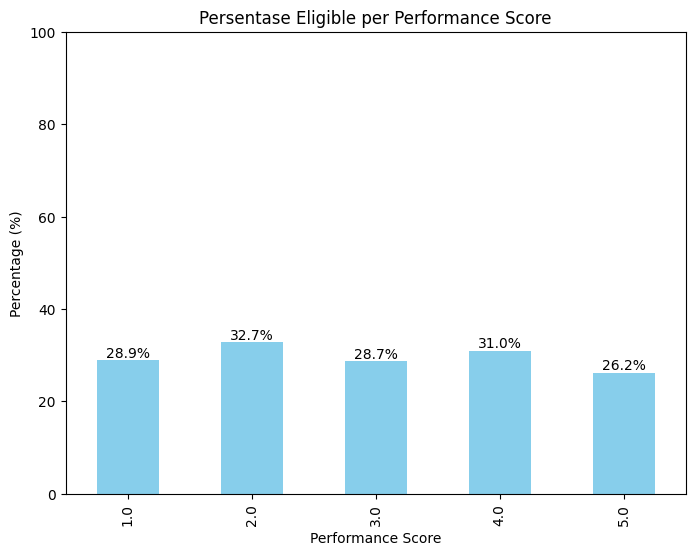

In [ ]:
import matplotlib.pyplot as plt

# Crosstab: % per Performance Score (tiap kolom = 100%)
ct = pd.crosstab(
    df['Promotion_Eligible'],
    df['Performance_Score'],
    normalize='columns'
) * 100

# Ambil hanya yang Eligible (Promotion_Eligible=1)
eligible_pct = ct.loc[1]

# Plot bar
ax = eligible_pct.plot(kind='bar', figsize=(8,6), color='skyblue')

# Tambahkan label %
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title("Persentase Eligible per Performance Score")
plt.ylabel("Percentage (%)")
plt.xlabel("Performance Score")
plt.ylim(0,100)   # Skalanya 0–100
plt.show()

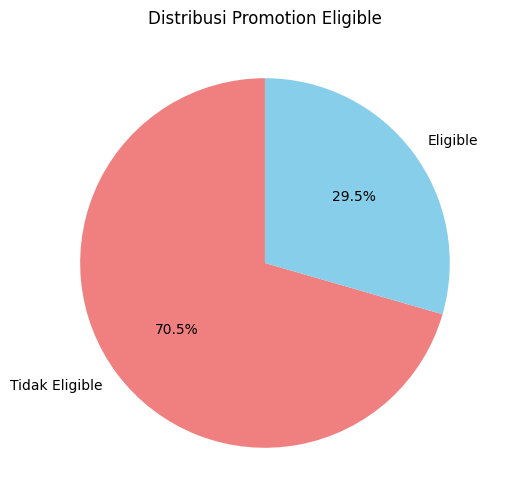

In [ ]:
import matplotlib.pyplot as plt

# Hitung distribusi Promotion_Eligible
counts = df['Promotion_Eligible'].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=counts.index.map({0:"Tidak Eligible", 1:"Eligible"}),
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral','skyblue']
)
plt.title("Distribusi Promotion Eligible")
plt.show()

# New Section